In [49]:
logFilePath = './解算日志1.txt'

In [50]:
ys = []
xs = []
with open(logFilePath) as f:
    while True:
        s = f.readline()
        if not s:
            break
        else:
            if s[0] == 'l':
                index = s.index('a')
                xs.append(float(s[index+4:index+16]))
                index = s.index('o')
                ys.append(float(s[index+4:index+16]))
print(xs)
print(ys)
            
        
    

[22.591696024, 22.59165517, 22.592019579, 22.59200044, 22.591823641, 22.591866461, 22.592047222, 22.591829708, 22.591837179, 22.591468192, 22.59162027, 22.591930507, 22.591942397, 22.591888878, 22.591890847]
[113.96254286, 113.96262557, 113.96232727, 113.96231372, 113.96232084, 113.96232362, 113.96227437, 113.9622706, 113.96226911, 113.96273238, 113.96252683, 113.96229321, 113.96222063, 113.96234158, 113.96242422]


In [51]:
stableXs = []
stableYs = []
with open(logFilePath) as f:
    while True:
        s = f.readline()
        if not s:
            break
        else:
            if s[0] == '坐':
                stableXs.append(float(s[8:26]))
                stableYs.append(float(s[-12:]))
print(stableXs)
print(stableYs)

[]
[]


In [52]:
import math
import numpy as np
points = [(xs[i], ys[i]) for i in range(len(xs))]

def distance(a, b):
    return math.sqrt((a[1] - b[1])**2 + (a[0] - b[0])**2)

def mean(points, length):
    x = y = 0
    for i in range(length):
        x += points[i][0]
        y += points[i][1]
    return x/length, y/length

def center(points, iteration=1000):
    """
        points (list of tuples)
    """
    if not points: return None
    old_center = points[0]
    length = math.ceil(len(points)*2/3)
    while iteration > 0:
        iteration -= 1
        points.sort(key=lambda p: distance(p, old_center))
        new_center = mean(points, length)
        if old_center == new_center:
            return new_center
        old_center = new_center
        
center(points)

(22.5919029637, 113.96231048)

In [53]:
x=y=0
x+=1
x,y

(1, 0)

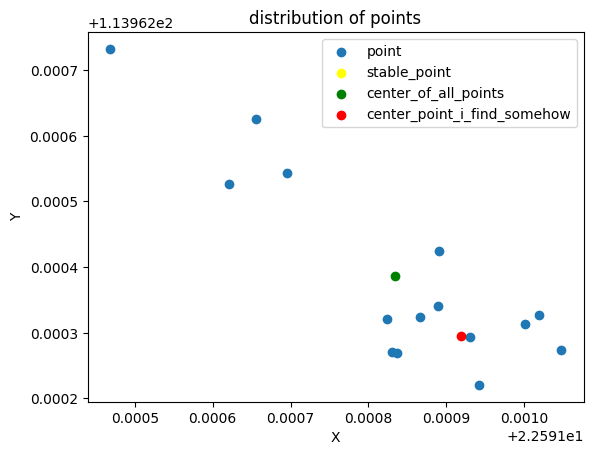

In [54]:
import matplotlib.pyplot as plt


# 创建一个新的图形
plt.figure()

# 绘制点
plt.scatter(xs, ys, label='point')
plt.scatter(stableXs, stableYs, label='stable_point', color='yellow')
plt.scatter(*mean(points, len(points)), label='center_of_all_points', color='green')
plt.scatter(*center(points), label='center_point_i_find_somehow', color='red')

# 设置图形的标题和坐标轴标签
plt.title('distribution of points')
plt.xlabel('X')
plt.ylabel('Y')

# 添加图例
plt.legend()

# # 设置X轴和Y轴的刻度范围
# plt.xlim(22.59195 - 0.0001, 22.59195 + 0.0001)
# plt.ylim(113.9621 - 0.0001, 113.9621 + 0.0001)

# 显示图形
plt.show()